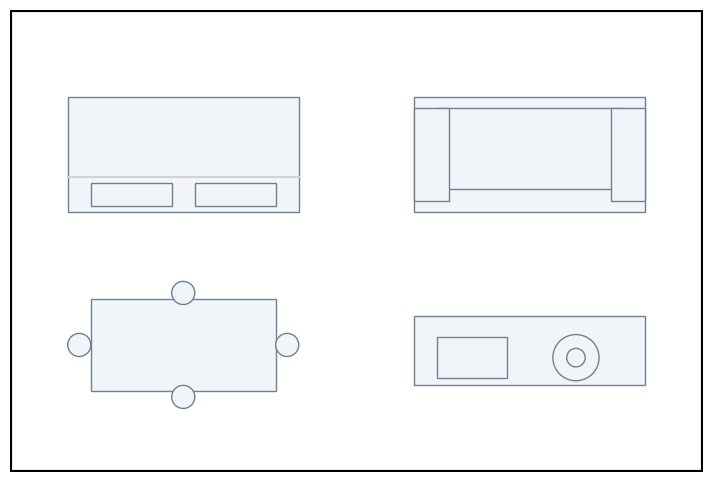

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from enum import Enum

# ---------- Furniture Enum (same as FurnitureType) ----------
class FurnitureType(Enum):
    Sofa = 1
    Bed = 2
    DiningTable = 3
    KitchenPlatform = 4


# ---------- Furniture Drawing Function ----------
def draw_furniture(ax, ftype, x, y, width, height):
    edge = "slategray"
    fill = "#f1f5f9"

    if ftype == FurnitureType.Sofa:
        ax.add_patch(patches.Rectangle((x, y), width, height,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Rectangle((x + width*0.1, y + height*0.2),
                                       width*0.8, height*0.7,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Rectangle((x, y + height*0.1),
                                       width*0.15, height*0.8,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Rectangle((x + width*0.85, y + height*0.1),
                                       width*0.15, height*0.8,
                                       edgecolor=edge, facecolor=fill))

    elif ftype == FurnitureType.Bed:
        ax.add_patch(patches.Rectangle((x, y), width, height,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Rectangle((x + width*0.1, y + height*0.05),
                                       width*0.35, height*0.2,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Rectangle((x + width*0.55, y + height*0.05),
                                       width*0.35, height*0.2,
                                       edgecolor=edge, facecolor=fill))
        ax.add_line(Line2D([x, x + width],
                           [y + height*0.3, y + height*0.3],
                           color="lightgray"))

    elif ftype == FurnitureType.DiningTable:
        ax.add_patch(patches.Rectangle((x + width*0.1, y + height*0.1),
                                       width*0.8, height*0.8,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Circle((x + width*0.5, y + height*0.05),
                                    width*0.05, edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Circle((x + width*0.5, y + height*0.95),
                                    width*0.05, edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Circle((x + width*0.05, y + height*0.5),
                                    width*0.05, edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Circle((x + width*0.95, y + height*0.5),
                                    width*0.05, edgecolor=edge, facecolor=fill))

    elif ftype == FurnitureType.KitchenPlatform:
        ax.add_patch(patches.Rectangle((x, y), width, height,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Rectangle((x + width*0.1, y + height*0.1),
                                       width*0.3, height*0.6,
                                       edgecolor=edge, facecolor=fill))
        ax.add_patch(patches.Circle((x + width*0.7, y + height*0.4),
                                    width*0.1, edgecolor=edge, facecolor="none"))
        ax.add_patch(patches.Circle((x + width*0.7, y + height*0.4),
                                    width*0.04, edgecolor=edge, facecolor=fill))


# ---------- DEMO FLOOR PLAN ----------
fig, ax = plt.subplots(figsize=(10, 6))

# Draw room outline
ax.add_patch(patches.Rectangle((0, 0), 12, 8,
                               edgecolor="black", facecolor="none", linewidth=3))

# Furniture placement
draw_furniture(ax, FurnitureType.Bed, 1, 4.5, 4, 2)
draw_furniture(ax, FurnitureType.Sofa, 7, 4.5, 4, 2)
draw_furniture(ax, FurnitureType.DiningTable, 1, 1.2, 4, 2)
draw_furniture(ax, FurnitureType.KitchenPlatform, 7, 1.5, 4, 1.2)

ax.set_xlim(0, 12)
ax.set_ylim(0, 8)
ax.set_aspect("equal")
ax.axis("off")

plt.show()

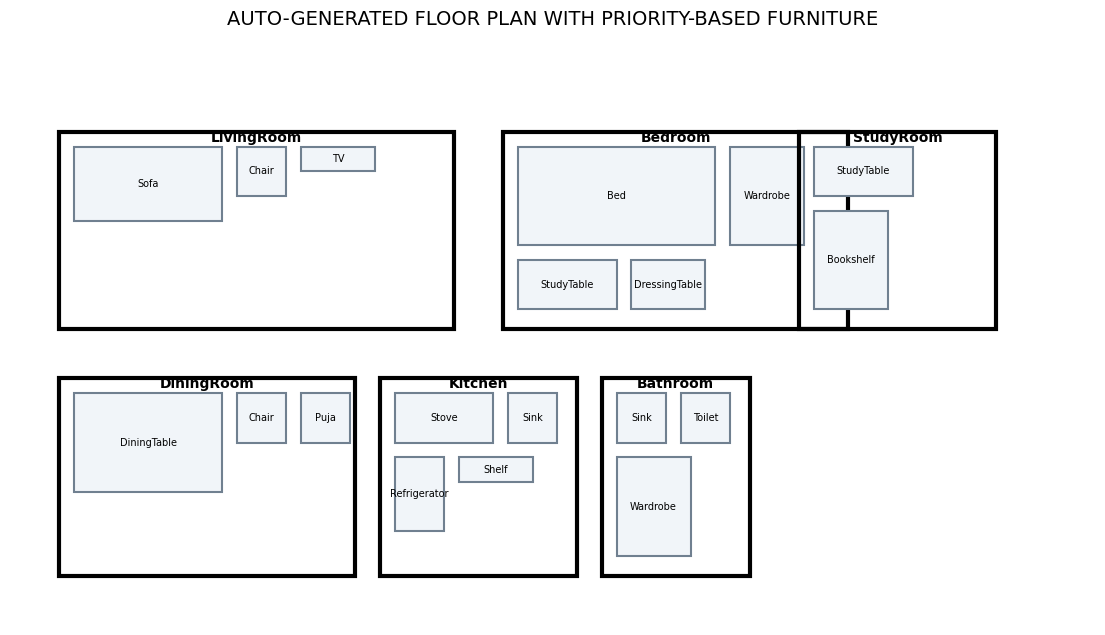

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ---------------------------
# ROOM → FURNITURE RULES
# ---------------------------
ROOM_FURNITURE_RULES = {
    "LivingRoom": ["Sofa", "Chair", "TV"],
    "Bedroom": ["Bed", "Wardrobe", "StudyTable", "DressingTable"],
    "StudyRoom": ["StudyTable", "Bookshelf"],
    "Office": ["WorkTable", "Sofa", "Shelf"],
    "DiningRoom": ["DiningTable", "Chair", "Puja"],
    "Bathroom": ["Sink", "Toilet", "Wardrobe"],
    "Kitchen": ["Stove", "Sink", "Refrigerator", "Shelf"]
}

# ---------------------------
# FURNITURE STANDARD SIZES
# ---------------------------
FURNITURE_SIZE = {
    "Bed": (4, 2),
    "Sofa": (3, 1.5),
    "Chair": (1, 1),
    "DiningTable": (3, 2),
    "StudyTable": (2, 1),
    "Wardrobe": (1.5, 2),
    "DressingTable": (1.5, 1),
    "Sink": (1, 1),
    "Toilet": (1, 1),
    "Stove": (2, 1),
    "Refrigerator": (1, 1.5),
    "Shelf": (1.5, 0.5),
    "Bookshelf": (1.5, 2),
    "WorkTable": (2, 1),
    "TV": (1.5, 0.5),
    "Puja": (1, 1)
}

# ---------------------------
# AUTO PLACEMENT LOGIC
# ---------------------------
def auto_place_furniture(room_x, room_y, room_w, room_h, furniture_list):
    placements = []
    cursor_x = room_x + 0.3
    cursor_y = room_y + room_h - 0.3
    row_height = 0

    for item in furniture_list:
        w, h = FURNITURE_SIZE[item]

        if cursor_x + w > room_x + room_w:
            cursor_x = room_x + 0.3
            cursor_y -= row_height + 0.3
            row_height = 0

        if cursor_y - h < room_y:
            break

        placements.append((item, cursor_x, cursor_y - h, w, h))
        cursor_x += w + 0.3
        row_height = max(row_height, h)

    return placements

# ---------------------------
# DRAW FURNITURE
# ---------------------------
def draw_furniture(ax, x, y, w, h, label):
    ax.add_patch(
        patches.Rectangle(
            (x, y), w, h,
            edgecolor="slategray",
            facecolor="#f1f5f9",
            linewidth=1.5
        )
    )
    ax.text(x + w/2, y + h/2, label,
            ha="center", va="center", fontsize=7)

# ---------------------------
# DRAW ROOM
# ---------------------------
def draw_room(ax, room_name, x, y, w, h):
    ax.add_patch(
        patches.Rectangle(
            (x, y), w, h,
            edgecolor="black",
            facecolor="none",
            linewidth=3
        )
    )
    ax.text(x + w/2, y + h - 0.2,
            room_name, ha="center", fontsize=10, fontweight="bold")

    furniture = ROOM_FURNITURE_RULES[room_name]
    placements = auto_place_furniture(x, y, w, h, furniture)

    for item, fx, fy, fw, fh in placements:
        draw_furniture(ax, fx, fy, fw, fh, item)

# ---------------------------
# MAIN FLOOR PLAN
# ---------------------------
fig, ax = plt.subplots(figsize=(14, 10))

draw_room(ax, "LivingRoom", 1, 6, 8, 4)
draw_room(ax, "Bedroom", 10, 6, 7, 4)
draw_room(ax, "DiningRoom", 1, 1, 6, 4)
draw_room(ax, "Kitchen", 7.5, 1, 4, 4)
draw_room(ax, "Bathroom", 12, 1, 3, 4)
draw_room(ax, "StudyRoom", 16, 6, 4, 4)

ax.set_xlim(0, 22)
ax.set_ylim(0, 12)
ax.set_aspect("equal")
ax.axis("off")

plt.title("AUTO-GENERATED FLOOR PLAN WITH PRIORITY-BASED FURNITURE", fontsize=14)
plt.show()


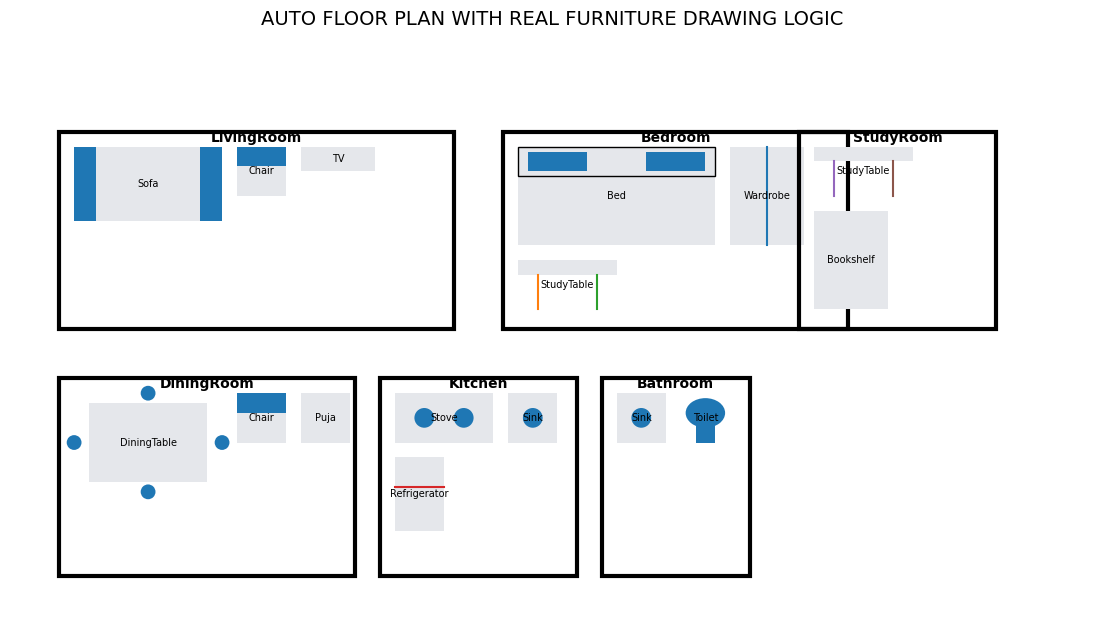

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -----------------------------------
# ROOM → FURNITURE PRIORITY RULES
# -----------------------------------
ROOM_FURNITURE = {
    "LivingRoom": ["Sofa", "Chair", "TV"],
    "Bedroom": ["Bed", "Wardrobe", "StudyTable"],
    "DiningRoom": ["DiningTable", "Chair", "Puja"],
    "Kitchen": ["Stove", "Sink", "Refrigerator"],
    "Bathroom": ["Sink", "Toilet"],
    "StudyRoom": ["StudyTable", "Bookshelf"]
}

# -----------------------------------
# STANDARD FURNITURE SIZES
# -----------------------------------
SIZE = {
    "Bed": (4, 2),
    "Sofa": (3, 1.5),
    "Chair": (1, 1),
    "DiningTable": (3, 2),
    "StudyTable": (2, 1),
    "Wardrobe": (1.5, 2),
    "Sink": (1, 1),
    "Toilet": (1, 1),
    "Stove": (2, 1),
    "Refrigerator": (1, 1.5),
    "Bookshelf": (1.5, 2),
    "TV": (1.5, 0.5),
    "Puja": (1, 1)
}

# -----------------------------------
# AUTO PLACEMENT (NO OVERLAP)
# -----------------------------------
def auto_place(rx, ry, rw, rh, items):
    placements = []
    x = rx + 0.3
    y = ry + rh - 0.3
    row_h = 0

    for item in items:
        w, h = SIZE[item]

        if x + w > rx + rw:
            x = rx + 0.3
            y -= row_h + 0.3
            row_h = 0

        if y - h < ry:
            break

        placements.append((item, x, y - h, w, h))
        x += w + 0.3
        row_h = max(row_h, h)

    return placements

# -----------------------------------
# FURNITURE DRAWING LOGIC
# -----------------------------------
def draw_furniture(ax, item, x, y, w, h):
    c = "#e5e7eb"

    if item == "Bed":
        ax.add_patch(patches.Rectangle((x,y), w,h, fill=True, fc=c))
        ax.add_patch(patches.Rectangle((x,y+h*0.7), w,h*0.3, fill=False))
        ax.add_patch(patches.Rectangle((x+w*0.05,y+h*0.75), w*0.3,h*0.2))
        ax.add_patch(patches.Rectangle((x+w*0.65,y+h*0.75), w*0.3,h*0.2))

    elif item == "Sofa":
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))
        ax.add_patch(patches.Rectangle((x,y), w*0.15,h))
        ax.add_patch(patches.Rectangle((x+w*0.85,y), w*0.15,h))

    elif item == "DiningTable":
        ax.add_patch(patches.Rectangle((x+w*0.1,y+h*0.1), w*0.8,h*0.8, fc=c))
        for dx, dy in [(0.5,0),(0.5,1),(0,0.5),(1,0.5)]:
            ax.add_patch(patches.Circle((x+w*dx,y+h*dy), 0.15))

    elif item == "Chair":
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))
        ax.add_patch(patches.Rectangle((x,y+h*0.6), w,h*0.4))

    elif item == "Wardrobe":
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))
        ax.plot([x+w/2,x+w/2],[y,y+h])

    elif item == "StudyTable":
        ax.add_patch(patches.Rectangle((x,y+h*0.7), w,h*0.3, fc=c))
        ax.plot([x+w*0.2,x+w*0.2],[y,y+h*0.7])
        ax.plot([x+w*0.8,x+w*0.8],[y,y+h*0.7])

    elif item == "Sink":
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))
        ax.add_patch(patches.Circle((x+w*0.5,y+h*0.5), 0.2))

    elif item == "Toilet":
        ax.add_patch(patches.Ellipse((x+w/2,y+h*0.6), w*0.8,h*0.6))
        ax.add_patch(patches.Rectangle((x+w*0.3,y), w*0.4,h*0.4))

    elif item == "Stove":
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))
        ax.add_patch(patches.Circle((x+w*0.3,y+h*0.5),0.2))
        ax.add_patch(patches.Circle((x+w*0.7,y+h*0.5),0.2))

    elif item == "Refrigerator":
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))
        ax.plot([x,x+w],[y+h*0.6,y+h*0.6])

    else:
        ax.add_patch(patches.Rectangle((x,y), w,h, fc=c))

    ax.text(x+w/2,y+h/2,item,ha="center",va="center",fontsize=7)

# -----------------------------------
# DRAW ROOM
# -----------------------------------
def draw_room(ax, name, x, y, w, h):
    ax.add_patch(patches.Rectangle((x,y), w,h, fill=False, lw=3))
    ax.text(x+w/2,y+h-0.2,name,ha="center",fontweight="bold")

    for item,x1,y1,w1,h1 in auto_place(x,y,w,h,ROOM_FURNITURE[name]):
        draw_furniture(ax,item,x1,y1,w1,h1)

# -----------------------------------
# MAIN FLOOR PLAN
# -----------------------------------
fig, ax = plt.subplots(figsize=(14,10))

draw_room(ax,"LivingRoom",1,6,8,4)
draw_room(ax,"Bedroom",10,6,7,4)
draw_room(ax,"DiningRoom",1,1,6,4)
draw_room(ax,"Kitchen",7.5,1,4,4)
draw_room(ax,"Bathroom",12,1,3,4)
draw_room(ax,"StudyRoom",16,6,4,4)

ax.set_xlim(0,22)
ax.set_ylim(0,12)
ax.set_aspect("equal")
ax.axis("off")

plt.title("AUTO FLOOR PLAN WITH REAL FURNITURE DRAWING LOGIC",fontsize=14)
plt.show()


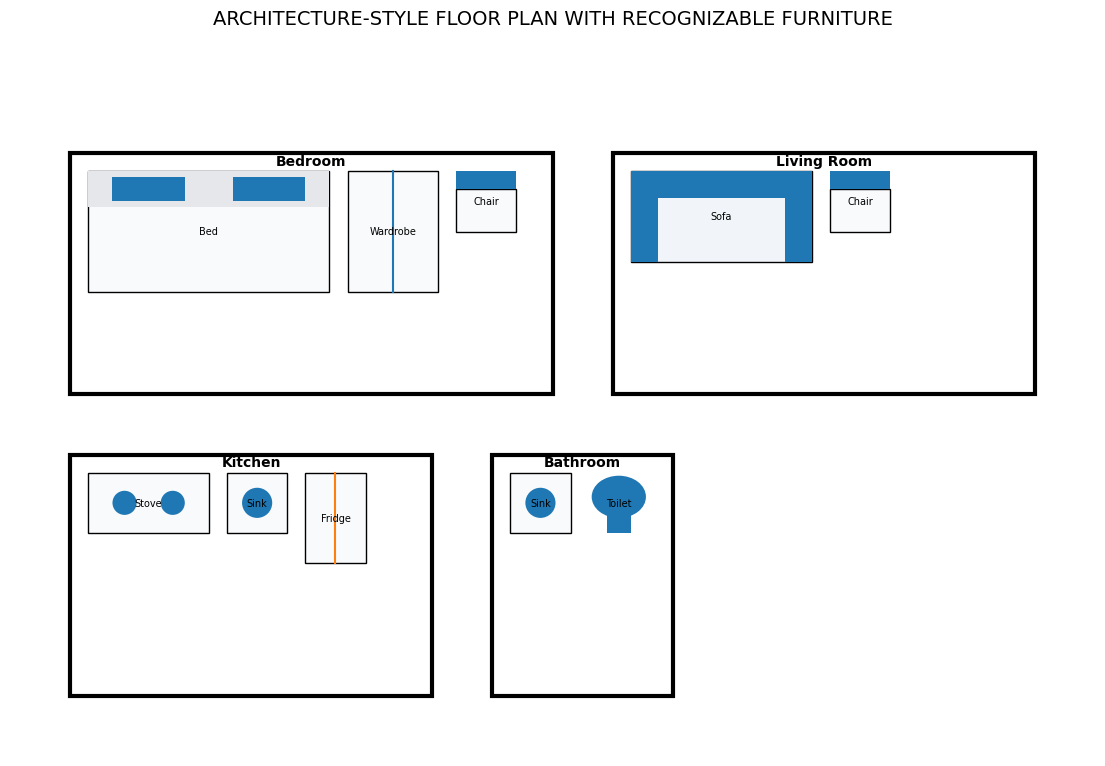

In [4]:
  import matplotlib.pyplot as plt
import matplotlib.patches as patches
from abc import ABC, abstractmethod

# ============================
# BASE CLASS
# ============================
class Furniture(ABC):
    def __init__(self, x, y, w, h, label):
        self.x, self.y, self.w, self.h = x, y, w, h
        self.label = label

    @abstractmethod
    def draw(self, ax):
        pass

    def label_center(self, ax):
        ax.text(self.x+self.w/2, self.y+self.h/2,
                self.label, ha="center", va="center", fontsize=7)

# ============================
# FURNITURE ICONS
# ============================
class Bed(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,fc="#f8fafc",ec="black"))
        ax.add_patch(patches.Rectangle((self.x,self.y+self.h*0.7),self.w,self.h*0.3,fc="#e5e7eb"))
        ax.add_patch(patches.Rectangle((self.x+self.w*0.1,self.y+self.h*0.75),self.w*0.3,self.h*0.2))
        ax.add_patch(patches.Rectangle((self.x+self.w*0.6,self.y+self.h*0.75),self.w*0.3,self.h*0.2))
        self.label_center(ax)

class Sofa(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,fc="#f1f5f9",ec="black"))
        ax.add_patch(patches.Rectangle((self.x,self.y+self.h*0.7),self.w,self.h*0.3))
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w*0.15,self.h))
        ax.add_patch(patches.Rectangle((self.x+self.w*0.85,self.y),self.w*0.15,self.h))
        self.label_center(ax)

class DiningTable(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x+self.w*0.15,self.y+self.h*0.15),
                                       self.w*0.7,self.h*0.7,fc="#f8fafc",ec="black"))
        for dx, dy in [(0.5,0.05),(0.5,0.95),(0.05,0.5),(0.95,0.5)]:
            ax.add_patch(patches.Circle((self.x+self.w*dx,self.y+self.h*dy),0.15))
        self.label_center(ax)

class Chair(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h*0.7,fc="#f8fafc",ec="black"))
        ax.add_patch(patches.Rectangle((self.x,self.y+self.h*0.7),self.w,self.h*0.3))
        self.label_center(ax)

class Sink(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,fc="#f8fafc",ec="black"))
        ax.add_patch(patches.Circle((self.x+self.w/2,self.y+self.h/2),0.25))
        self.label_center(ax)

class Toilet(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Ellipse((self.x+self.w/2,self.y+self.h*0.6),
                                     self.w*0.9,self.h*0.7))
        ax.add_patch(patches.Rectangle((self.x+self.w*0.3,self.y),
                                       self.w*0.4,self.h*0.3))
        self.label_center(ax)

class Stove(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,fc="#f8fafc",ec="black"))
        ax.add_patch(patches.Circle((self.x+self.w*0.3,self.y+self.h*0.5),0.2))
        ax.add_patch(patches.Circle((self.x+self.w*0.7,self.y+self.h*0.5),0.2))
        self.label_center(ax)

class Wardrobe(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,fc="#f8fafc",ec="black"))
        ax.plot([self.x+self.w/2,self.x+self.w/2],[self.y,self.y+self.h])
        self.label_center(ax)

# ============================
# ROOM + AUTO PLACEMENT
# ============================
class Room:
    def __init__(self, name, x, y, w, h, furniture_classes):
        self.name, self.x, self.y, self.w, self.h = name, x, y, w, h
        self.furniture_classes = furniture_classes

    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,
                                       fill=False,lw=3))
        ax.text(self.x+self.w/2,self.y+self.h-0.2,
                self.name,ha="center",fontweight="bold")

        cx, cy, row_h = self.x+0.3, self.y+self.h-0.3, 0
        for cls, (fw, fh), label in self.furniture_classes:
            if cx+fw > self.x+self.w:
                cx = self.x+0.3
                cy -= row_h+0.3
                row_h = 0
            if cy-fh < self.y:
                break

            f = cls(cx, cy-fh, fw, fh, label)
            f.draw(ax)

            cx += fw+0.3
            row_h = max(row_h, fh)

# ============================
# MAIN FLOOR PLAN
# ============================
fig, ax = plt.subplots(figsize=(14,10))

Room("Bedroom",1,6,8,4,[
    (Bed,(4,2),"Bed"),
    (Wardrobe,(1.5,2),"Wardrobe"),
    (Chair,(1,1),"Chair")
]).draw(ax)

Room("Living Room",10,6,7,4,[
    (Sofa,(3,1.5),"Sofa"),
    (Chair,(1,1),"Chair"),
    (DiningTable,(3,2),"Table")
]).draw(ax)

Room("Kitchen",1,1,6,4,[
    (Stove,(2,1),"Stove"),
    (Sink,(1,1),"Sink"),
    (Wardrobe,(1,1.5),"Fridge")
]).draw(ax)

Room("Bathroom",8,1,3,4,[
    (Sink,(1,1),"Sink"),
    (Toilet,(1,1),"Toilet")
]).draw(ax)

ax.set_xlim(0,18)
ax.set_ylim(0,12)
ax.set_aspect("equal")
ax.axis("off")
plt.title("ARCHITECTURE-STYLE FLOOR PLAN WITH RECOGNIZABLE FURNITURE",fontsize=14)
plt.show()


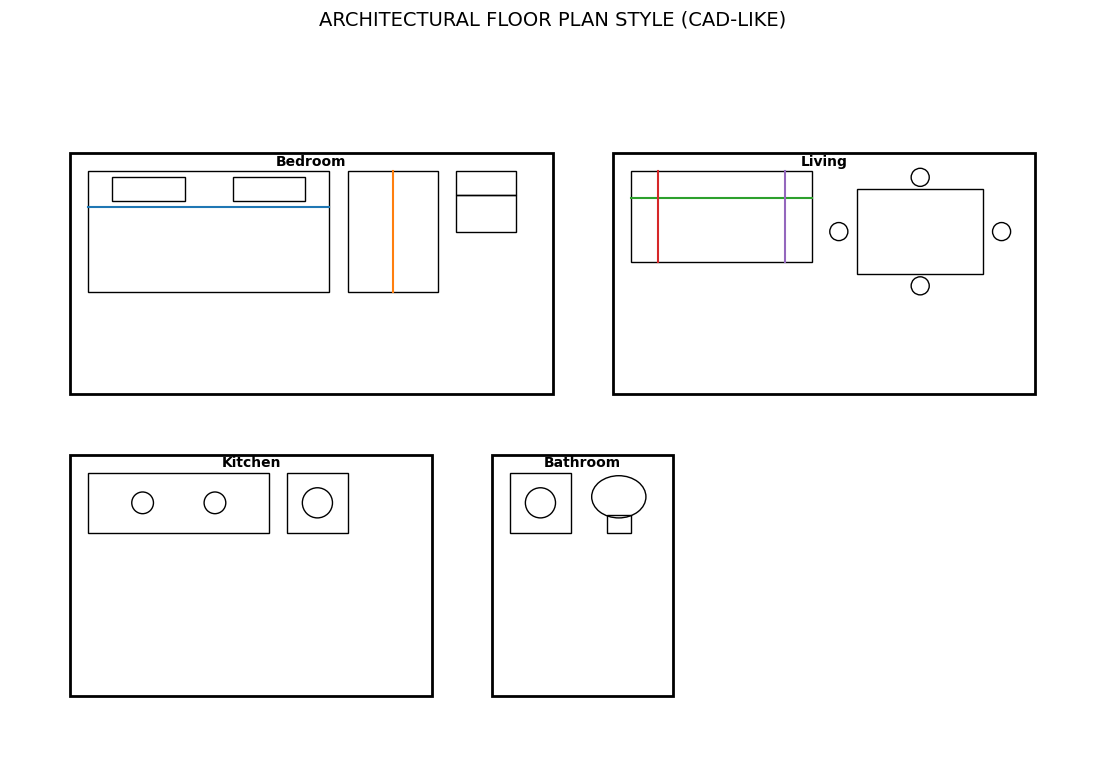

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from abc import ABC, abstractmethod

LINE = dict(fill=False, edgecolor="black", linewidth=1)

# ==========================
# BASE CLASS
# ==========================
class Furniture(ABC):
    def __init__(self, x, y, w, h):
        self.x, self.y, self.w, self.h = x, y, w, h

    @abstractmethod
    def draw(self, ax):
        pass

# ==========================
# ARCHITECTURAL SYMBOLS
# ==========================
class Bed(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,**LINE))
        ax.plot([self.x,self.x+self.w],[self.y+self.h*0.7,self.y+self.h*0.7])
        ax.add_patch(patches.Rectangle((self.x+self.w*0.1,self.y+self.h*0.75),
                                       self.w*0.3,self.h*0.2,**LINE))
        ax.add_patch(patches.Rectangle((self.x+self.w*0.6,self.y+self.h*0.75),
                                       self.w*0.3,self.h*0.2,**LINE))

class Sofa(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,**LINE))
        ax.plot([self.x,self.x+self.w],[self.y+self.h*0.7,self.y+self.h*0.7])
        ax.plot([self.x+self.w*0.15,self.x+self.w*0.15],[self.y,self.y+self.h])
        ax.plot([self.x+self.w*0.85,self.x+self.w*0.85],[self.y,self.y+self.h])

class DiningTable(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x+self.w*0.15,self.y+self.h*0.15),
                                       self.w*0.7,self.h*0.7,**LINE))
        for dx, dy in [(0.5,0.05),(0.5,0.95),(0.05,0.5),(0.95,0.5)]:
            ax.add_patch(patches.Circle((self.x+self.w*dx,self.y+self.h*dy),
                                        0.15,**LINE))

class Chair(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h*0.6,**LINE))
        ax.add_patch(patches.Rectangle((self.x,self.y+self.h*0.6),
                                       self.w,self.h*0.4,**LINE))

class Wardrobe(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,**LINE))
        ax.plot([self.x+self.w/2,self.x+self.w/2],[self.y,self.y+self.h])

class Sink(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,**LINE))
        ax.add_patch(patches.Circle((self.x+self.w/2,self.y+self.h/2),
                                    0.25,**LINE))

class Toilet(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Ellipse((self.x+self.w/2,self.y+self.h*0.6),
                                     self.w*0.9,self.h*0.7,**LINE))
        ax.add_patch(patches.Rectangle((self.x+self.w*0.3,self.y),
                                       self.w*0.4,self.h*0.3,**LINE))

class KitchenPlatform(Furniture):
    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,**LINE))
        ax.add_patch(patches.Circle((self.x+self.w*0.3,self.y+self.h*0.5),
                                    0.18,**LINE))
        ax.add_patch(patches.Circle((self.x+self.w*0.7,self.y+self.h*0.5),
                                    0.18,**LINE))

# ==========================
# ROOM
# ==========================
class Room:
    def __init__(self, name, x, y, w, h, furniture):
        self.name, self.x, self.y, self.w, self.h = name, x, y, w, h
        self.furniture = furniture

    def draw(self, ax):
        ax.add_patch(patches.Rectangle((self.x,self.y),self.w,self.h,
                                       fill=False,linewidth=2))
        ax.text(self.x+self.w/2,self.y+self.h-0.2,
                self.name,ha="center",fontweight="bold")

        cx, cy = self.x+0.3, self.y+self.h-0.3
        row_h = 0
        for item, size in self.furniture:
            w,h = size
            if cx+w > self.x+self.w:
                cx = self.x+0.3
                cy -= row_h+0.3
                row_h = 0
            f = item(cx, cy-h, w, h)
            f.draw(ax)
            cx += w+0.3
            row_h = max(row_h,h)

# ==========================
# MAIN
# ==========================
fig, ax = plt.subplots(figsize=(14,10))

Room("Bedroom",1,6,8,4,[
    (Bed,(4,2)),
    (Wardrobe,(1.5,2)),
    (Chair,(1,1))
]).draw(ax)

Room("Living",10,6,7,4,[
    (Sofa,(3,1.5)),
    (DiningTable,(3,2))
]).draw(ax)

Room("Kitchen",1,1,6,4,[
    (KitchenPlatform,(3,1)),
    (Sink,(1,1))
]).draw(ax)

Room("Bathroom",8,1,3,4,[
    (Sink,(1,1)),
    (Toilet,(1,1))
]).draw(ax)

ax.set_xlim(0,18)
ax.set_ylim(0,12)
ax.set_aspect("equal")
ax.axis("off")
plt.title("ARCHITECTURAL FLOOR PLAN STYLE (CAD-LIKE)",fontsize=14)
plt.show()
